In [1]:
### Step 1: Install Dependencies
!pip install numpy pandas scikit-learn matplotlib seaborn

In [2]:
### Step 2: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
### Step 3: Load Dataset (Titanic Survival Prediction)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)
print('Data Loaded Successfully')

Data Loaded Successfully


In [5]:
### Step 4: Data Preprocessing
# Handling missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [6]:
# Encoding categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [7]:
# Dropping irrelevant columns
data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

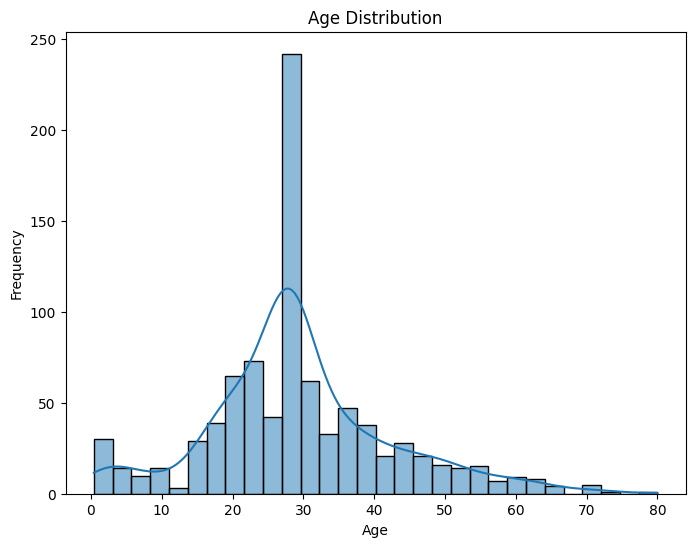

In [8]:
### Step 5: Exploratory Data Analysis (EDA)
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


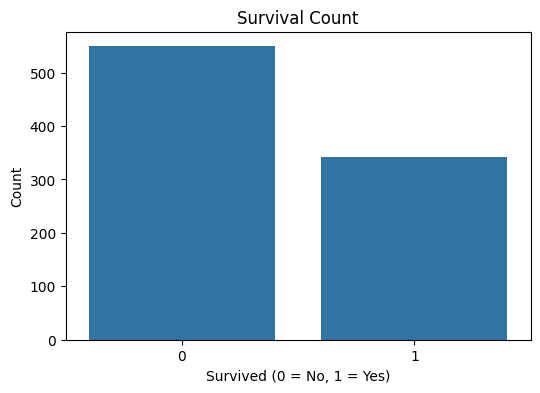

In [9]:
# Survival Count Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


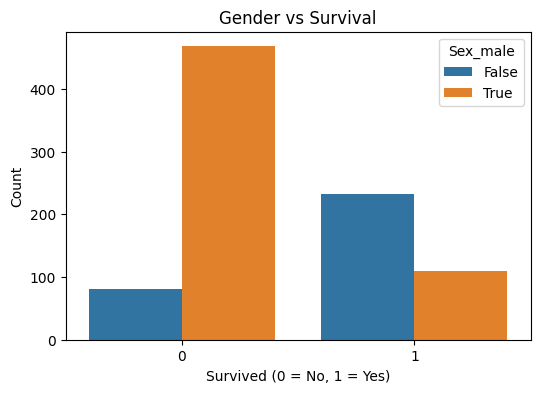

In [10]:
# Gender vs Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex_male', data=data)
plt.title('Gender vs Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

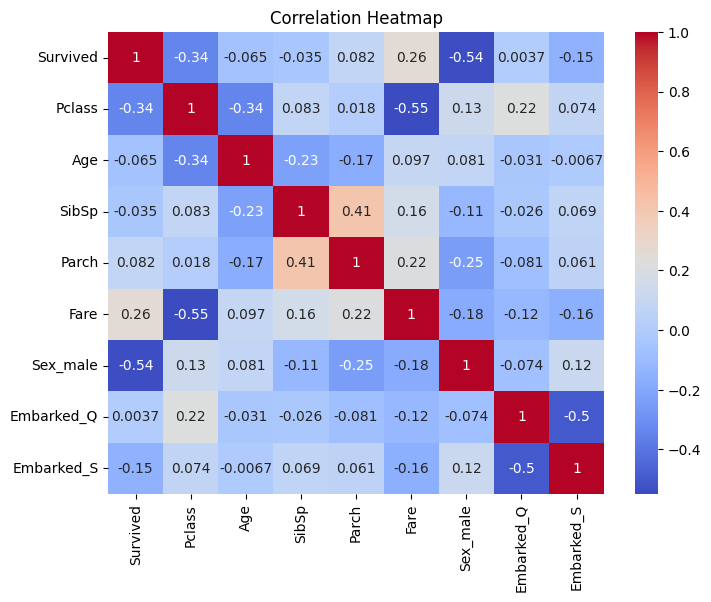

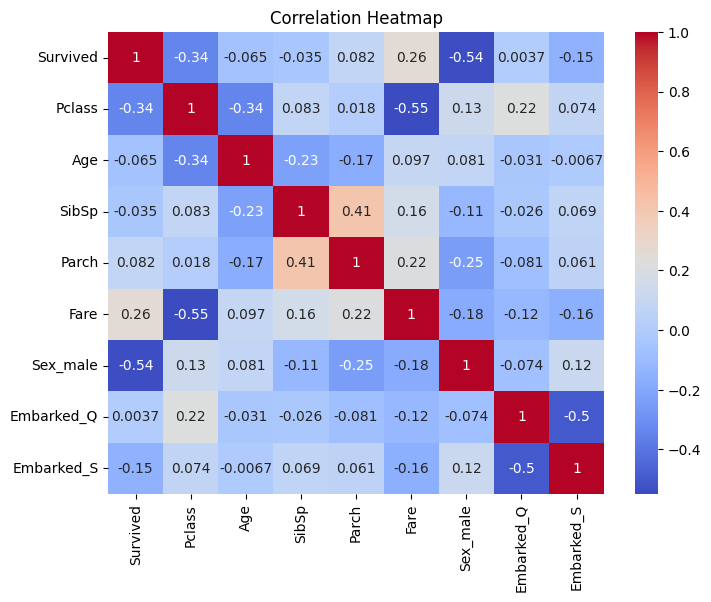

In [11]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
### Step 6: Feature Engineering and Splitting Data
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
### Step 7: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
### Step 8: Model Evaluation
predictions = model.predict(X_test)

In [15]:
# Accuracy and Classification Report
print('Accuracy:', accuracy_score(y_test, predictions))
print('Confusion Matrix:', confusion_matrix(y_test, predictions))
print('Classification Report:', classification_report(y_test, predictions))

Accuracy: 0.8212290502793296
Confusion Matrix: [[91 14]
 [18 56]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



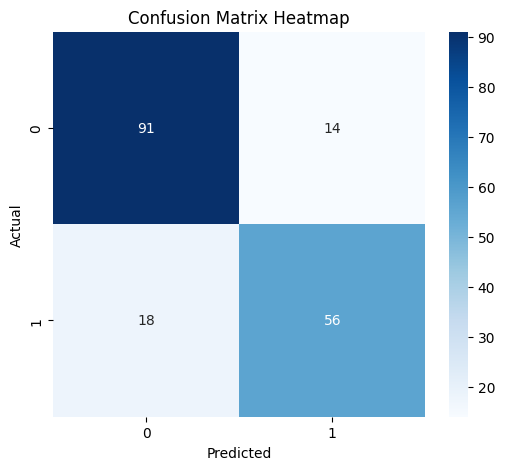

Accuracy: 0.8212290502793296
Confusion Matrix: [[91 14]
 [18 56]]
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [16]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
predictions = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print('Confusion Matrix:', confusion_matrix(y_test, predictions))
print('Classification Report:', classification_report(y_test, predictions))


In [19]:
import joblib

joblib.dump(model, "titanic_survival_prediction.pkl")

['titanic_survival_prediction.pkl']